In [2]:
#Increases the graphs visibility and readability
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Dimensionality Reduction with Crypto

## Data Aquisition and Processing

Before doing anything I need to find crypto data.

In [3]:
import pandas as pd
df = pd.read_csv('crypto-markets.csv')
df

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.300000,135.980000,132.100000,134.210000,0.0,1.500520e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.440000,147.490000,134.000000,144.540000,0.0,1.491160e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.000000,146.930000,134.050000,139.000000,0.0,1.597780e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.000000,139.890000,107.720000,116.990000,0.0,1.542820e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.380000,125.600000,92.280000,105.210000,0.0,1.292190e+09,0.3881,33.32
5,bitcoin,BTC,Bitcoin,2013-05-03,1,106.250000,108.130000,79.100000,97.750000,0.0,1.180070e+09,0.6424,29.03
6,bitcoin,BTC,Bitcoin,2013-05-04,1,98.100000,115.000000,92.500000,112.500000,0.0,1.089890e+09,0.8889,22.50
7,bitcoin,BTC,Bitcoin,2013-05-05,1,112.900000,118.800000,107.140000,115.910000,0.0,1.254760e+09,0.7521,11.66
8,bitcoin,BTC,Bitcoin,2013-05-06,1,115.980000,124.660000,106.640000,112.300000,0.0,1.289470e+09,0.3141,18.02
9,bitcoin,BTC,Bitcoin,2013-05-07,1,112.250000,113.440000,97.700000,111.500000,0.0,1.248470e+09,0.8767,15.74


While I found this all encompassing dataset at [kaggle](https://www.kaggle.com/jessevent/all-crypto-currencies), its not in a format thats very useful. I would like to mimic the example given in the assignment and change the data. To accomplish this I will take in only the `name`, `symbol`, `date`, and `open` features in my dataframes

In [4]:
data_pd = pd.read_csv("crypto-markets.csv",
                      usecols=['name','date','open'])
ref_pd = pd.read_csv("crypto-markets.csv",
                      usecols=['name','symbol'])
ref_unique = ref_pd.drop_duplicates()
#ref_unique = ref_unique.reset_index()

print data_pd.head()
print ref_unique.head()


      name        date    open
0  Bitcoin  2013-04-28  135.30
1  Bitcoin  2013-04-29  134.44
2  Bitcoin  2013-04-30  144.00
3  Bitcoin  2013-05-01  139.00
4  Bitcoin  2013-05-02  116.38
     symbol          name
0       BTC       Bitcoin
1866    ETH      Ethereum
2901    XRP        Ripple
4669    BCH  Bitcoin Cash
4988    EOS           EOS


Now I have two dataframes.  
`data_pd` will be reshaped into a DataFrame that gives the coin name by its average value for a given month. This will be accomplished by extracting the datetimes from the `date` feature.  
`ref_unique` is a dataframe strictly for reference. The indexes tell me how many values each coin has, while the DataFrame itself allows me to reference which name corresponds for which symbol. This may be useful later on when ploting and displaying graphs.

In [5]:
from datetime import datetime

data_pd['month'] = pd.DatetimeIndex(data_pd['date']).month
data_pd['year'] = pd.DatetimeIndex(data_pd['date']).year
data_pd['month_year'] = data_pd['month'].map(str) + "/" + data_pd['year'].map(str)
data_pd.head()

,name,date,open,month,year,month_year
0,Bitcoin,2013-04-28,135.30,4,2013,4/2013
1,Bitcoin,2013-04-29,134.44,4,2013,4/2013
2,Bitcoin,2013-04-30,144.00,4,2013,4/2013
3,Bitcoin,2013-05-01,139.00,5,2013,5/2013
4,Bitcoin,2013-05-02,116.38,5,2013,5/2013


I have now extracted all of the months and years from the `date` data and made them their own column. 

In [6]:
dates_unique = data_pd[['month','year']].copy()
dates_unique = dates_unique.drop_duplicates()
dates_unique = dates_unique.reset_index()
dates_unique['month_year'] = dates_unique['month'].map(str) + "/" + dates_unique['year'].map(str)
print dates_unique

    index  month  year month_year
0       0      4  2013     4/2013
1       3      5  2013     5/2013
2      34      6  2013     6/2013
3      64      7  2013     7/2013
4      95      8  2013     8/2013
5     126      9  2013     9/2013
6     156     10  2013    10/2013
7     187     11  2013    11/2013
8     217     12  2013    12/2013
9     248      1  2014     1/2014
10    279      2  2014     2/2014
11    307      3  2014     3/2014
12    338      4  2014     4/2014
13    368      5  2014     5/2014
14    399      6  2014     6/2014
15    429      7  2014     7/2014
16    460      8  2014     8/2014
17    491      9  2014     9/2014
18    521     10  2014    10/2014
19    552     11  2014    11/2014
20    582     12  2014    12/2014
21    613      1  2015     1/2015
22    644      2  2015     2/2015
23    672      3  2015     3/2015
24    703      4  2015     4/2015
25    733      5  2015     5/2015
26    764      6  2015     6/2015
27    794      7  2015     7/2015
28    825     

In [7]:
coin_val_by_month = pd.DataFrame()
coin_val_by_month['coin_name'] = ref_unique['name'].values

for date in dates_unique.month_year:
    coin_val_by_month[date]=None
print coin_val_by_month 

                coin_name 4/2013 5/2013 6/2013 7/2013 8/2013 9/2013 10/2013  \
0                 Bitcoin   None   None   None   None   None   None    None   
1                Ethereum   None   None   None   None   None   None    None   
2                  Ripple   None   None   None   None   None   None    None   
3            Bitcoin Cash   None   None   None   None   None   None    None   
4                     EOS   None   None   None   None   None   None    None   
5                Litecoin   None   None   None   None   None   None    None   
6                 Stellar   None   None   None   None   None   None    None   
7                 Cardano   None   None   None   None   None   None    None   
8                    IOTA   None   None   None   None   None   None    None   
9                    TRON   None   None   None   None   None   None    None   
10                    NEO   None   None   None   None   None   None    None   
11                 Monero   None   None   None   Non

Now we have created the the base layout of the new dataframe. Currently it is filled completely with None's as placeholder data. This will be useful for after filling in the data, any non-existing data will remain as None.

In [8]:
temp = pd.DataFrame()

#for every coin
for coin in ref_unique.name:
    #for every month/year
    for date in dates_unique.month_year:
        #extract from master data rows with specified coin and month/year
        temp = data_pd.loc[(data_pd['month_year'] == date) & (data_pd['name'] == coin)]
        
        #print/calculate average
        print str(coin) + '\t' + str(date) + '\t',
        print temp['open'].sum(axis=0) / temp['open'].count()
        
        #print temp
    #comment me for every coin
    break

Bitcoin	4/2013	137.91333333333333
Bitcoin	5/2013	120.29225806451613
Bitcoin	6/2013	108.85633333333332
Bitcoin	7/2013	90.3116129032258
Bitcoin	8/2013	113.04193548387096
Bitcoin	9/2013	130.1806666666667
Bitcoin	10/2013	156.03161290322583
Bitcoin	11/2013	520.506
Bitcoin	12/2013	813.1180645161289
Bitcoin	1/2014	841.7022580645162
Bitcoin	2/2014	670.839285714286
Bitcoin	3/2014	595.782258064516
Bitcoin	4/2014	461.649
Bitcoin	5/2014	480.99129032258065
Bitcoin	6/2014	615.222
Bitcoin	7/2014	619.7735483870966
Bitcoin	8/2014	539.6880645161291
Bitcoin	9/2014	448.10033333333337
Bitcoin	10/2014	365.7483870967742
Bitcoin	11/2014	364.85066666666665
Bitcoin	12/2014	343.07451612903225
Bitcoin	1/2015	251.80000000000004
Bitcoin	2/2015	232.82142857142858
Bitcoin	3/2015	269.27870967741933
Bitcoin	4/2015	235.70766666666665
Bitcoin	5/2015	237.16225806451618
Bitcoin	6/2015	236.94133333333335
Bitcoin	7/2015	278.85774193548394
Bitcoin	8/2015	252.98774193548383
Bitcoin	9/2015	233.4876666666667
Bitcoin	10/2015	262.

Here is a quick sample run of calculating every months average for bitcoin. By uncommenting the break you can calculate every coins monthly average. There is most likely a better way to do this in a more efficient and less iterative manor, but I've pulled as much functionality out of Pandas that I can.  

Now the I just need to modify the snipit above to populate `coin_val_by_month` and we can begin with the dimensionality reduction.

In [9]:
#mod_dates = dates_unique.copy()
dates_2013 = dates_unique.loc[(dates_unique['year'] == 2013)]
dates_2014 = dates_unique.loc[(dates_unique['year'] == 2014)]
dates_2015 = dates_unique.loc[(dates_unique['year'] == 2015)]
dates_2016 = dates_unique.loc[(dates_unique['year'] == 2016)]
dates_2017 = dates_unique.loc[(dates_unique['year'] == 2017)]
dates_2018 = dates_unique.loc[(dates_unique['year'] == 2018)]
print dates_2013

   index  month  year month_year
0      0      4  2013     4/2013
1      3      5  2013     5/2013
2     34      6  2013     6/2013
3     64      7  2013     7/2013
4     95      8  2013     8/2013
5    126      9  2013     9/2013
6    156     10  2013    10/2013
7    187     11  2013    11/2013
8    217     12  2013    12/2013


After trying to rework the averaging code to populate my new `coin_val_by_month` dataframe, I realised that trying to process all the data at once was too much. So instead I broke up the dates by year. This is going to force me to create a `coin_val_by_month` dataframe for each individual year but that shouldn't be a huge hassle.

In [10]:
coin_val_by_month_2013 = pd.DataFrame()
coin_val_by_month_2013['coin_name'] = coin_val_by_month['coin_name'].copy(deep=True)
for month_year in dates_2013.month_year:
    coin_val_by_month_2013[month_year] = coin_val_by_month[month_year].copy(deep=False)

coin_val_by_month_2014 = pd.DataFrame()
coin_val_by_month_2014['coin_name'] = coin_val_by_month['coin_name'].copy(deep=True)
for month_year in dates_2014.month_year:
    coin_val_by_month_2014[month_year] = coin_val_by_month[month_year].copy(deep=False)
    
coin_val_by_month_2015 = pd.DataFrame()
coin_val_by_month_2015['coin_name'] = coin_val_by_month['coin_name'].copy(deep=True)
for month_year in dates_2015.month_year:
    coin_val_by_month_2015[month_year] = coin_val_by_month[month_year].copy(deep=False)

coin_val_by_month_2016 = pd.DataFrame()
coin_val_by_month_2016['coin_name'] = coin_val_by_month['coin_name'].copy(deep=True)
for month_year in dates_2016.month_year:
    coin_val_by_month_2016[month_year] = coin_val_by_month[month_year].copy(deep=False)

coin_val_by_month_2017 = pd.DataFrame()
coin_val_by_month_2017['coin_name'] = coin_val_by_month['coin_name'].copy(deep=True)
for month_year in dates_2017.month_year:
    coin_val_by_month_2017[month_year] = coin_val_by_month[month_year].copy(deep=False)

coin_val_by_month_2018 = pd.DataFrame()
coin_val_by_month_2018['coin_name'] = coin_val_by_month['coin_name'].copy(deep=True)
for month_year in dates_2018.month_year:
    coin_val_by_month_2018[month_year] = coin_val_by_month[month_year].copy(deep=False)

"""
print coin_val_by_month_2013.head()
print coin_val_by_month_2014.head()
print coin_val_by_month_2015.head()
print coin_val_by_month_2016.head()
print coin_val_by_month_2017.head()
"""
print coin_val_by_month_2018.head()

      coin_name 1/2018 2/2018 3/2018 4/2018 5/2018 6/2018
0       Bitcoin   None   None   None   None   None   None
1      Ethereum   None   None   None   None   None   None
2        Ripple   None   None   None   None   None   None
3  Bitcoin Cash   None   None   None   None   None   None
4           EOS   None   None   None   None   None   None


I've made all of these dataframes shallow copies, meaning that their values point to the same values in the master `coin_val_by_month`. This allow me to perform analysis on individual years, or if I crunch the averages for each year separately, perform the analysis on the master `coin_val_by_month`. Its sort of a pseudo pointer system wherin each of my sub-`coin_val_by_month` dataframes are just references to subsections of the master `coin_val_by_month` dataframe.  

Now with that out of the way we can populate a single year worth of data. I am going to use the 2018 data for 2 primary reasons.  

1) Most of the coins within my dataset have not existed for the large chunk of time my dataset represents. By choosing the most recent year I will maximize the coin diversity in my analysis.

2) 2018's dataset does not cover the whole year which allows me to cut down the computation time.

### NOTE:
After completing this next code snippit I had to include a progress tracker to gauge just how slow the computation is. It is easy to see how slow this part runs, but whats worse is the percent tracker tracks the percentage of coins complete for only a single month. For 2018 you have to wait for it to climb to 100% 6 times.

I don't have the patience for that as I'm sure you don't as well so I will drop all but the top 100 coins.

In [11]:

"""
from IPython.display import clear_output

temp = pd.DataFrame()

#progress tracker
total_coins = ref_unique['name'].count()
percent_done = 0
coin_ctr = 0

#for every month/year
for date in dates_2018.month_year:
    
    coin_ctr = 0
    #for every coin
    for coin in ref_unique.name: 
        coin_ctr += 1
        if float(coin_ctr* 100 / total_coins) > percent_done:
            clear_output(wait=True)
            print date + " " + str(float(coin_ctr* 100 / total_coins)) + "% completed"
            percent_done = int(coin_ctr* 100 / total_coins)
            
        #extract from master data rows with specified coin and month/year
        temp = data_pd.loc[(data_pd['month_year'] == date) & (data_pd['name'] == coin)] 
        temp = temp.dropna(subset=['open'])
        if temp.empty:
            continue
        
        coin_val_by_month_2018.at[coin, date] = temp['open'].sum(axis=0) / temp['open'].count()
        
        
        #print/calculate average
        #print str(coin) + '\t' + str(date) + '\t',
        #print temp['open'].sum(axis=0) / temp['open'].count()
        
        #print temp
    print coin_val_by_month_2018
    #comment me for every coin
    break
"""

1/2018 25.0% completed


KeyboardInterrupt: 

Below I am recreating the same layout of sub dataframes referencing the master dataframe, but limiting the scope to only be the top 100 coins.

In [12]:
#new naming scheme
#[c]oin [v]alue [b]y [m]onth_[t]op [100]
cvbm_t100 = coin_val_by_month.copy(deep=True)
cvbm_t100 = cvbm_t100.drop(cvbm_t100.index[[x for x in range(100,cvbm_t100['coin_name'].count())]])
#print cvbm_t100

cvbm_2013_t100 = pd.DataFrame()
cvbm_2014_t100 = pd.DataFrame()
cvbm_2015_t100 = pd.DataFrame()
cvbm_2016_t100 = pd.DataFrame()
cvbm_2017_t100 = pd.DataFrame()
cvbm_2018_t100 = pd.DataFrame()

cvbm_2013_t100['coin_name'] = cvbm_t100['coin_name'].copy(deep=True)
for month_year in dates_2013.month_year:
    cvbm_2013_t100[month_year] = cvbm_t100[month_year].copy(deep=False)
cvbm_2013_t100 = cvbm_2013_t100.set_index('coin_name')

cvbm_2014_t100['coin_name'] = cvbm_t100['coin_name'].copy(deep=True)
for month_year in dates_2014.month_year:
    cvbm_2014_t100[month_year] = cvbm_t100[month_year].copy(deep=False)
cvbm_2014_t100 = cvbm_2014_t100.set_index('coin_name')
    
cvbm_2015_t100['coin_name'] = cvbm_t100['coin_name'].copy(deep=True)
for month_year in dates_2015.month_year:
    cvbm_2015_t100[month_year] = cvbm_t100[month_year].copy(deep=False)
cvbm_2015_t100 = cvbm_2015_t100.set_index('coin_name')
    
cvbm_2016_t100['coin_name'] = cvbm_t100['coin_name'].copy(deep=True)
for month_year in dates_2016.month_year:
    cvbm_2016_t100[month_year] = cvbm_t100[month_year].copy(deep=False)
cvbm_2016_t100 = cvbm_2016_t100.set_index('coin_name')
    
cvbm_2017_t100['coin_name'] = cvbm_t100['coin_name'].copy(deep=True)
for month_year in dates_2017.month_year:
    cvbm_2017_t100[month_year] = cvbm_t100[month_year].copy(deep=False)
cvbm_2017_t100 = cvbm_2017_t100.set_index('coin_name')
    
cvbm_2018_t100['coin_name'] = cvbm_t100['coin_name'].copy(deep=True)
for month_year in dates_2018.month_year:
    cvbm_2018_t100[month_year] = cvbm_t100[month_year].copy(deep=False)
cvbm_2018_t100 = cvbm_2018_t100.set_index('coin_name')

"""
print cvbm_2013_t100.head()
print cvbm_2014_t100.head()
print cvbm_2015_t100.head()
print cvbm_2016_t100.head()
print cvbm_2017_t100.head()
"""    
print cvbm_2018_t100


                 1/2018 2/2018 3/2018 4/2018 5/2018 6/2018
coin_name                                                 
Bitcoin            None   None   None   None   None   None
Ethereum           None   None   None   None   None   None
Ripple             None   None   None   None   None   None
Bitcoin Cash       None   None   None   None   None   None
EOS                None   None   None   None   None   None
Litecoin           None   None   None   None   None   None
Stellar            None   None   None   None   None   None
Cardano            None   None   None   None   None   None
IOTA               None   None   None   None   None   None
TRON               None   None   None   None   None   None
NEO                None   None   None   None   None   None
Monero             None   None   None   None   None   None
Dash               None   None   None   None   None   None
Tether             None   None   None   None   None   None
NEM                None   None   None   None   None   No

In [13]:
from IPython.display import clear_output

temp = pd.DataFrame()

#progress tracker
total_coins = cvbm_t100['coin_name'].count()
percent_done = 0
coin_ctr = 0

#for every month/year
for date in dates_2018.month_year:
    
    coin_ctr = 0
    #for every coin in top 100 list
    for coin in cvbm_t100.coin_name: 
        coin_ctr += 1
        if (coin_ctr* 100 / total_coins) % 5 == 0:
            clear_output(wait=True)
            print date + " " + str(float(coin_ctr* 100 / total_coins)) + "% completed"
            percent_done = (coin_ctr* 100 / total_coins)
            
        #extract from master data rows with specified coin and month/year
        temp = data_pd.loc[(data_pd['month_year'] == date) & (data_pd['name'] == coin)] 
        temp = temp.dropna(subset=['open'])
        if temp.empty:
            continue
        
        cvbm_2018_t100.at[coin, date] = temp['open'].sum(axis=0) / temp['open'].count()
  
        #print/calculate average
        #print str(coin) + '\t' + str(date) + '\t',
        #print temp['open'].sum(axis=0) / temp['open'].count()
    
    #comment me for every coin
    #break
print cvbm_2018_t100

6/2018 100.0% completed
                      1/2018       2/2018       3/2018       4/2018  \
coin_name                                                             
Bitcoin              13212.1      9462.24      9156.59      7963.62   
Ethereum              1093.1      882.528      640.787      512.149   
Ripple               1.91581     0.985602     0.748771     0.670673   
Bitcoin Cash         2154.39      1275.39      1037.48      915.211   
EOS                  12.2006      9.09286      6.47484      9.71533   
Litecoin             218.462      183.907      171.876      133.222   
Stellar             0.582762     0.404596     0.272747     0.291199   
Cardano             0.755435     0.379777     0.215973      0.22643   
IOTA                 3.21097      1.87286      1.40968      1.48407   
TRON               0.0976284    0.0438761    0.0399893    0.0482248   
NEO                  127.415       119.97        83.35      63.9367   
Monero               364.679      266.016      252.44

Some quick clean up to remove any NaN data...

In [15]:
#drop all NaN and Nones
cvbm_2018_t100_complete = cvbm_2018_t100.copy(deep=True)
cvbm_2018_t100_complete.dropna(how='any',inplace = True)
#print (cvbm_2018_t100_complete)

And aquiring and processing the data is now complete!

## Dimensionality Reduction

The first step in any Dimensionality Reduction is the Principle Concept Analysis, or PCA. PCA is a form of linear dimensionality reduction that utilizes Singular Value Decomposition to compress the data into lower dimensional space.

In [48]:
from sklearn.decomposition import PCA
    
pca = PCA(n_components=2)
pca.fit(cvbm_2018_t100_complete)

existing_2d = pca.transform(cvbm_2018_t100_complete)

existing_df_2d = pd.DataFrame(existing_2d)
existing_df_2d.index = cvbm_2018_t100_complete.index
existing_df_2d.columns = ['PC1','PC2']
existing_df_2d.head()

AttributeError: 'DataFrame' object has no attribute 'top'

Above, we not only ran our data through the PCA calculation, but also formatted it and put it into a new dataframe. With the calculations done we can view the explained varience ratio.

In [17]:
print(pca.explained_variance_ratio_) 

[0.99820567 0.00150392]


Over 99.82% of the varience is contained within the first PC, while the second PC explained 0.15% of the varience. This is great because it means that less than 0.03% of the varience was lost within the PCA calculations.

With the calcualtions completed, we can not plot the lower dimensional representation of our dataset. This chart is very clustered, so I recommend utilizing matplotlibs built in zooming tools to explore and manipulate the chart.

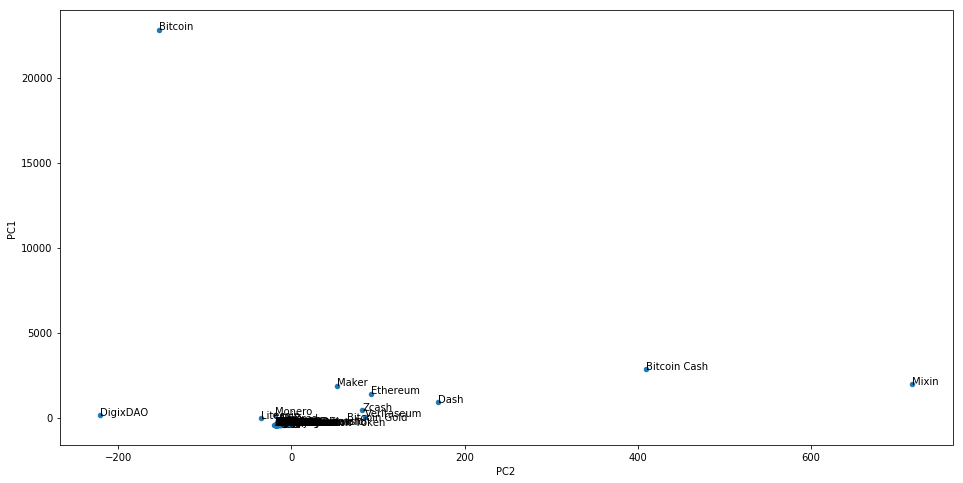

In [19]:
# Inline is commented out because of the large unreadable cluster created
#%matplotlib inline
%matplotlib notebook
    
ax = existing_df_2d.plot(kind='scatter', x='PC2', y='PC1', figsize=(16,8))
    
for i, coin in enumerate(cvbm_2018_t100_complete.index):
    ax.annotate(
        coin, 
        (existing_df_2d.iloc[i].PC2, existing_df_2d.iloc[i].PC1)
    )
    
# I reccomend running the script at the top of the page and extending the graph 
#  so you can poke around in the dense cluster that forms

From the last graph, it becomes very clear to see that Bitcoin is the the largest outlier with this dataset. With a PCA of over 20k while most coins don't break 2.5k is pretty remarkable. This leads me to believe that PC1 is largely representative of pricing data amongst the coins. Lets take a look...

In [43]:
print cvbm_2018_t100_complete.loc['Bitcoin']
print "Mean: " + str(cvbm_2018_t100_complete.loc['Bitcoin'].mean())
print existing_df_2d.loc['Bitcoin']

1/2018    13212.1
2/2018    9462.24
3/2018    9156.59
4/2018    7963.62
5/2018    8505.24
6/2018    7586.49
Name: Bitcoin, dtype: object
Mean: 9314.375440348182
PC1    22823.217213
PC2     -153.483138
Name: Bitcoin, dtype: float64


Given the pricing data, I hypothesize that the PC1 can be mostly attributed to the pricing data or at least its value on average. It also appears to be scaled up by a factor slightly greator then 2. This is probubly to keep most coins with a value of less than $1 at a PC1 of around 1. 

Bitcoin is also <-150 for PC2 and lost half its value. Maybe the PC2 represents the overall movement, or average movement of the coin's value. Lets look at some other outliers to see how accurate this is.  

By this logic, `Mixin` the PC2 positive outlier, should have a huge price spike at some point within the 6 months we analyzed.

In [44]:
print cvbm_2018_t100_complete.loc['Mixin']
print "Mean: " + str(cvbm_2018_t100_complete.loc['Mixin'].mean())
print existing_df_2d.loc['Mixin']

1/2018    1894.76
2/2018    902.143
3/2018    487.841
4/2018    573.689
5/2018     944.21
6/2018    754.777
Name: Mixin, dtype: object
Mean: 926.2367326131483
PC1    1985.796898
PC2     716.856403
Name: Mixin, dtype: float64


Perhaps its not a representative movement, but shows which direction the outleir is, whether it be positive or negative. `Bitcoin's` was negative, floating around 10k with 2 dips down to 7k, while `Mixin's` was positive hovering around 600 with a spike at 2k.  

It's also worth pointing out that my first hypothesis is holding up here, as the PC1 is roughly 2x greator than the mean value of all of the pricing data.

Lets look at one last outlier, `DigixDAO`, to complete this trifecta of outliers.

In [45]:
print cvbm_2018_t100_complete.loc['DigixDAO']
print "Mean: " + str(cvbm_2018_t100_complete.loc['DigixDAO'].mean())
print existing_df_2d.loc['DigixDAO']

1/2018    200.686
2/2018    302.859
3/2018    377.031
4/2018    244.122
5/2018    202.717
6/2018     145.42
Name: DigixDAO, dtype: object
Mean: 245.47224398361496
PC1    148.363324
PC2   -220.890105
Name: DigixDAO, dtype: float64


Here my first hypothesis is not finding uch support as the mean is greater than the PC1.  

My second theory does get some support because The primary pricing outlier is a very negative one being ~100 less than the mean.  

While I could investigate ore datapoints I am convinced that the PC1 is primarily influenced by the magnitude of the pricing data, while the PC2 is primarily influenced by the outliers and the average of the pricing data.

## Bonus
Because Bitcoin is such a huge outlier in the PC1 of the calculated data above, I thought it would be interesting to see how the data is affected by its removal before the calculation.

In [50]:
from sklearn.decomposition import PCA
    
cvbm_2018_t100_complete_noBTC = cvbm_2018_t100_complete.drop(cvbm_2018_t100_complete.index[0])
    
pca = PCA(n_components=2)
pca.fit(cvbm_2018_t100_complete_noBTC)

existing_2d = pca.transform(cvbm_2018_t100_complete_noBTC)

existing_df_2d = pd.DataFrame(existing_2d)
existing_df_2d.index = cvbm_2018_t100_complete_noBTC.index
existing_df_2d.columns = ['PC1','PC2']
print existing_df_2d.shape
existing_df_2d.head()


(88, 2)


,PC1,PC2
coin_name,,
Ethereum,1669.948360,-158.333714
Ripple,-180.359898,5.317361
Bitcoin Cash,3145.730734,9.771250
EOS,-156.734892,2.031948
Litecoin,214.572343,-65.177141


Here you can see Bitcoin is removed, and was removed before the PCA calculation. Does the varience change at all?

In [47]:
print(pca.explained_variance_ratio_) 

[0.98271457 0.01305132]


Surprisingly, the PC1 varience went from 99.82% to 98.27% a meager change of ~1.55%. And I say meager because there are 88 coins within this calculation. Removing any one removes 1.136% of data from the dataframe. Despite this, and despite how large of an outlier Bitcoin was in PC1, its removal does little to affect the PC1 varience.  

However, the PC2 varience has increased to pick up the slack from 0.0015 to 0.0131. This is an increase of .0116 which keeping the accuracy of PCA well above 99.6%.

Lets plot this new chart.

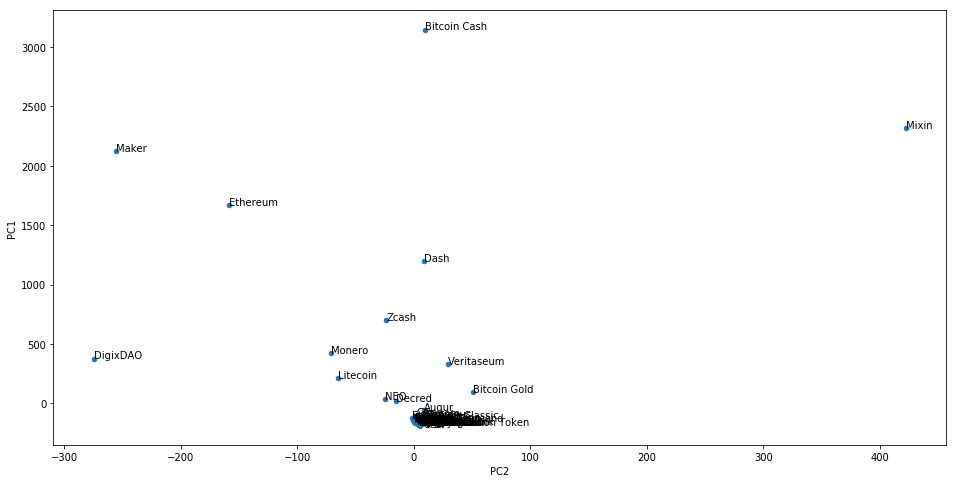

In [51]:
%matplotlib inline
    
ax = existing_df_2d.plot(kind='scatter', x='PC2', y='PC1', figsize=(16,8))
    
for i, coin in enumerate(cvbm_2018_t100_complete_noBTC.index):
    ax.annotate(
        coin, 
        (existing_df_2d.iloc[i].PC2, existing_df_2d.iloc[i].PC1)
    )

I now understand that dimensionality reduction is no where near as black and white as I first thought. I had hoped that utilizing a dataset like crypto values would help me try to decode PCA or at least how it works. Unlike the movie ratings and catagories shown in class where even at the end the relations were still a little fuzzy, I hoped that a dataset with a strong average and far outliers would help me further decode how the algorithm reduces its diensions by looking at the extreams. Unfortunately it's not that simple but very intersting and useful nonetheless.

### Bibliography
https://www.codementor.io/jadianes/data-science-python-pandas-r-dimensionality-reduction-du1081aka
https://www.kaggle.com/jessevent/all-crypto-currencies